### [ASHRAE - Great Energy Predictor III](https://www.kaggle.com/c/ashrae-energy-prediction/data)
click [here](https://www.kaggle.com/c/9994/download-all) to download all files 


## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mtl
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [197]:
train = pd.read_csv('C://Users//stron//Downloads//KAGGLE//train.csv')
buildings = pd.read_csv('C://Users//stron//Downloads//KAGGLE//building_metadata.csv')
weather = pd.read_csv('C://Users//stron//Downloads//KAGGLE//weather_train.csv')

### See Math Statistics

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [5]:
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [7]:
train.head()

,building_id,meter,timestamp,meter_reading
5485057,471,0,2016-04-13 13:00:00,171.3000
321873,159,0,2016-01-06 20:00:00,11.2100
4469043,531,0,2016-03-26 02:00:00,6.5900
7435776,1357,0,2016-05-18 05:00:00,7.6500
14485744,94,0,2016-09-20 23:00:00,64.7067


In [8]:
buildings.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [9]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [10]:
train.describe()

,building_id,meter,meter_reading
count,1000000.000000,1000000.000000,1.000000e+06
mean,799.540145,0.662900,1.989380e+03
std,426.992375,0.930761,1.426684e+05
min,0.000000,0.000000,0.000000e+00
25%,393.000000,0.000000,1.828758e+01
50%,896.000000,0.000000,7.890400e+01
75%,1179.000000,1.000000,2.677948e+02
max,1448.000000,3.000000,2.013220e+07


In [11]:
buildings.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [12]:
weather.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


## Provide missing data analysis

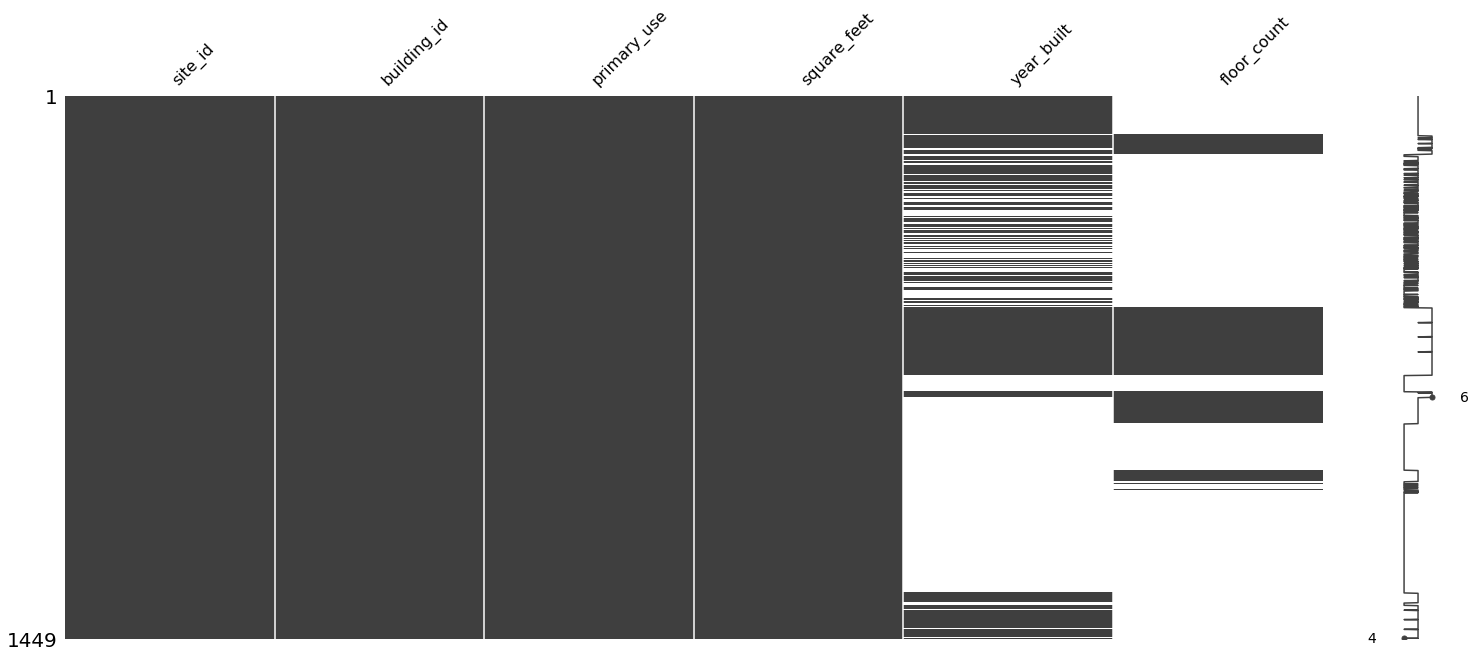

In [13]:
msno.matrix(buildings)

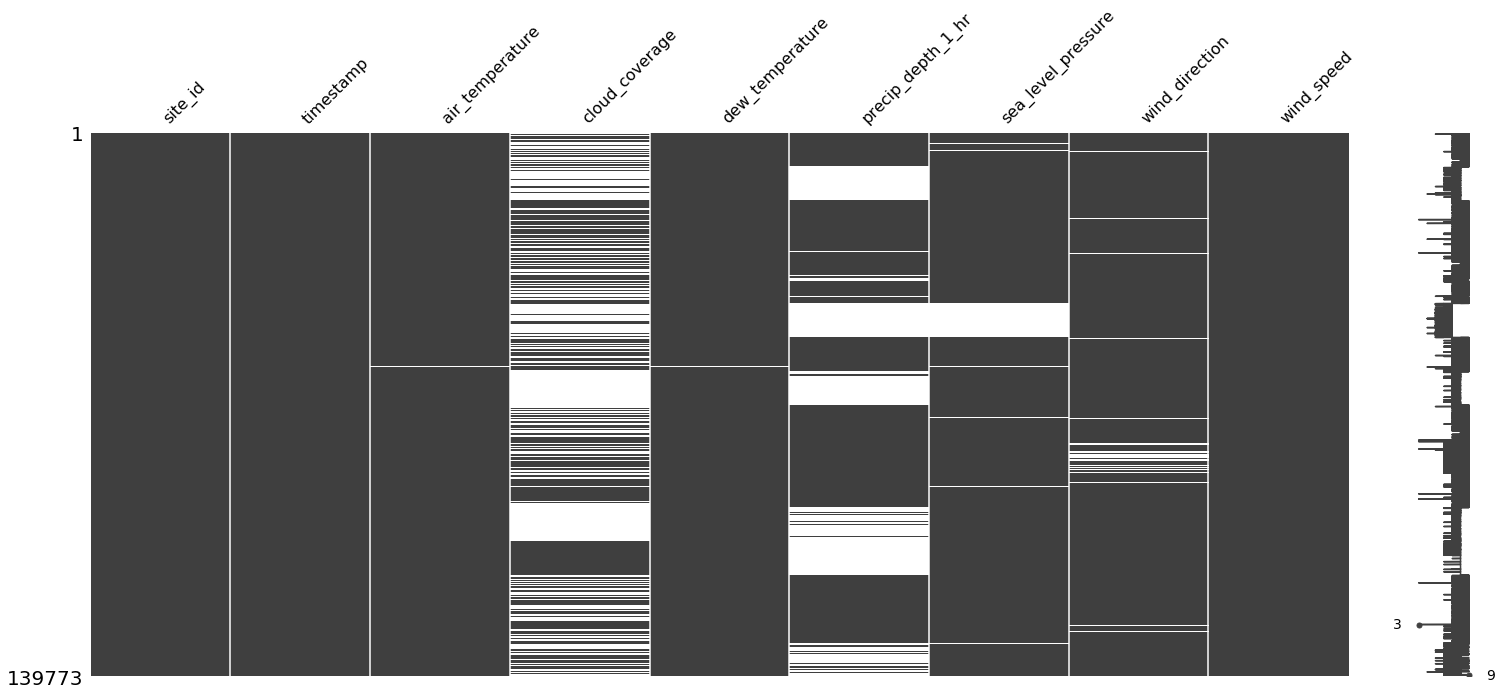

In [14]:
msno.matrix(weather)

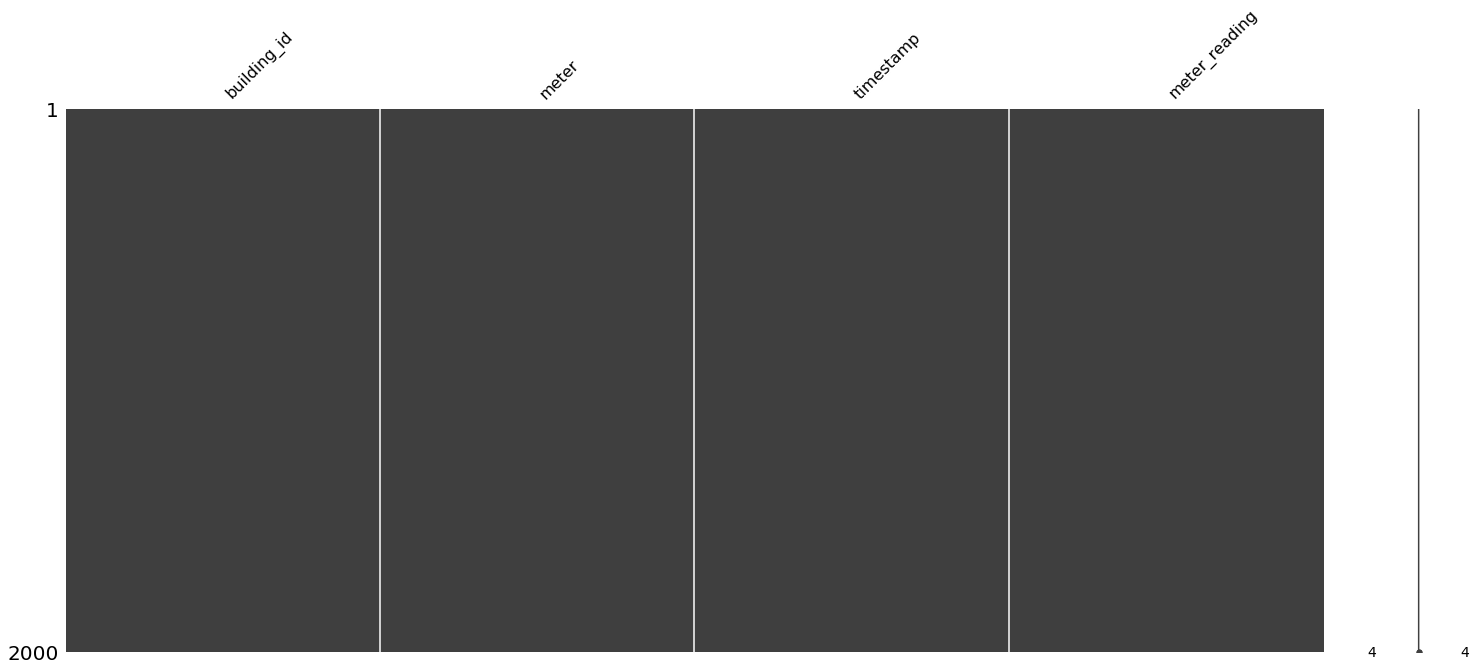

In [15]:
msno.matrix(train.sample(2000))

## Numerical Data Analysis : see distribution

In [15]:
train_num = train["meter_reading"]
num__buildings = buildings["square_feet"]
num_weather = weather[["air_temperature","cloud_coverage","dew_temperature",
                       "precip_depth_1_hr","sea_level_pressure","wind_direction","wind_speed"]]

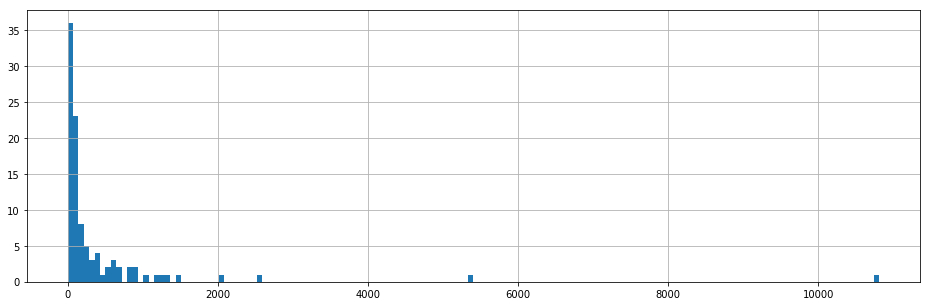

In [16]:
train_num.sample(100).hist(figsize=(16, 5), bins=150,)

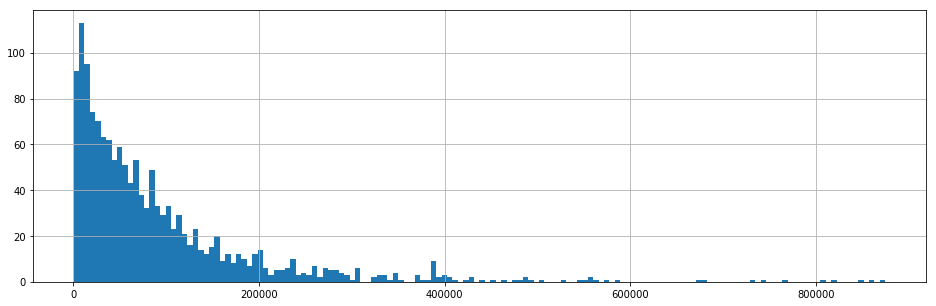

In [17]:
num__buildings.hist(figsize=(16, 5), bins=150,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9AEADA390>,
      dtype=object)

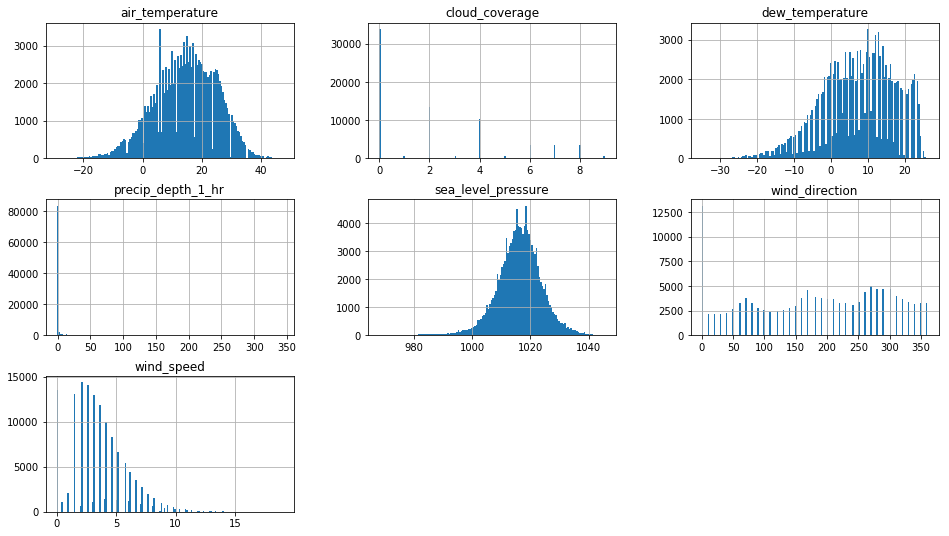

In [18]:
num_weather.hist(figsize=(16, 9), bins=150,)

## Correlation Map

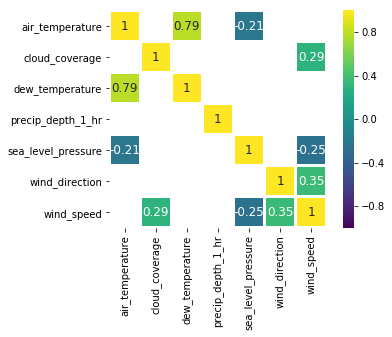

In [19]:
corr = num_weather.corr()
sb.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1.9,
            annot=True, annot_kws={"size": 12}, square=True);

## Categorical data analisys: see distribution and box plot

In [20]:
categ_buildings = buildings[['site_id', 'building_id', 'year_built', 'floor_count']]
categ_train = train[['building_id', 'meter']]

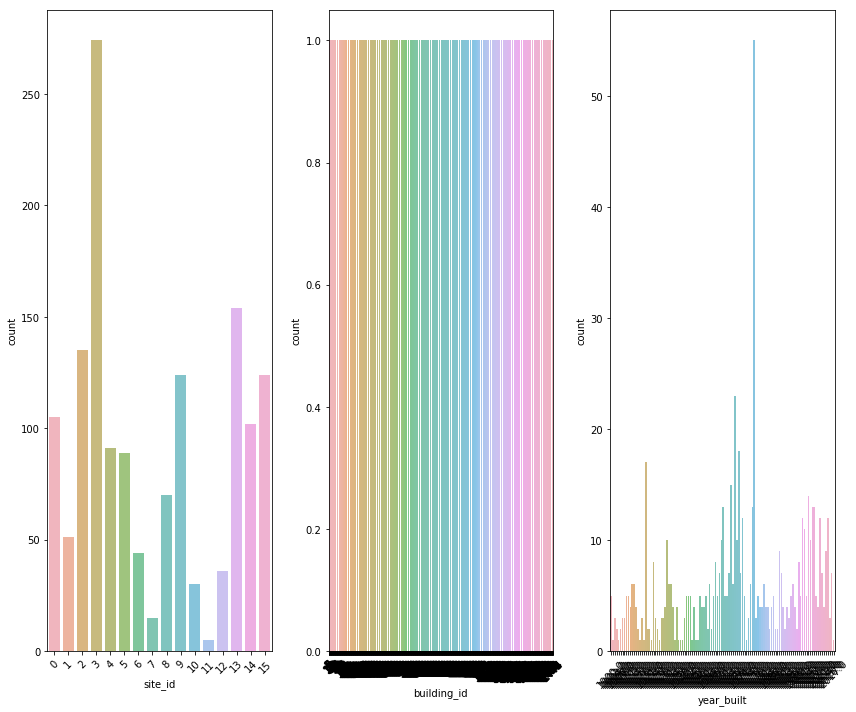

In [21]:
df=categ_buildings
fig, axes = plt.subplots(round(len(categ_buildings.columns) / 3), 3, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(df.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=df.columns[i], alpha=0.7, data=df, ax=ax)

fig.tight_layout()

## Dataframe aggregation : join all in one dataset by primary key

In [186]:
train = train.set_index(['building_id','meter','timestamp'],drop=False).join(buildings.set_index('building_id'))

In [187]:
train = pd.merge(train.set_index(['site_id'],drop=False,append=True), weather.set_index(['site_id','timestamp']), on=['site_id','timestamp'], how='inner')

## Data modification: in KBU to kWt

In [188]:
def change(x):
    if x['site_id']==0 and x['meter']==0 :
        x['meter_reading']*= 0.2931 
    return x

train = train.apply(change, axis=1)

## Drop correlated columns and unuseful columns

In [193]:
train = train.drop(columns=['cloud_coverage','precip_depth_1_hr','sea_level_pressure','wind_direction','year_built','dew_temperature'])

##  Fill NaN with values

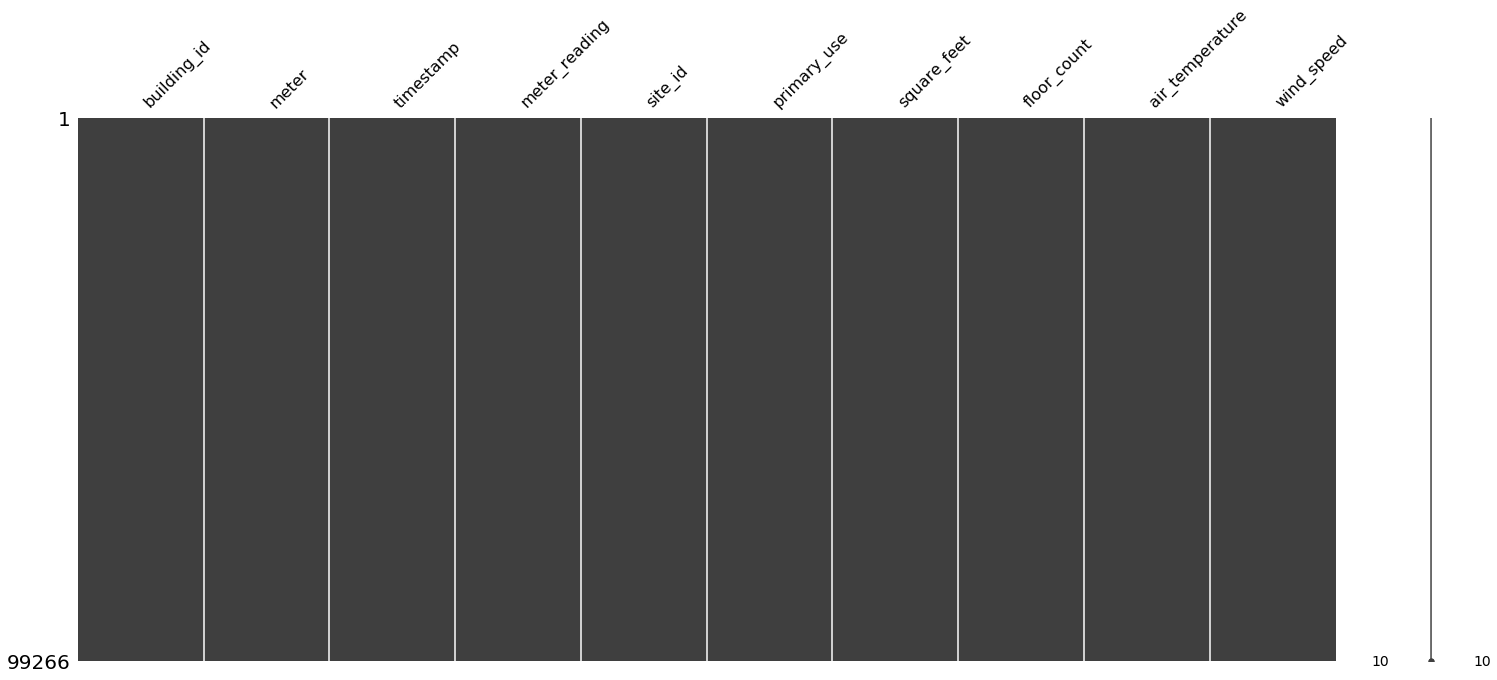

In [194]:
train['floor_count'] = train['floor_count'].fillna(1)
msno.matrix(train)

## Drop rows with Nan

In [191]:
train = train.dropna()

## Plot graphics for checking outbursts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

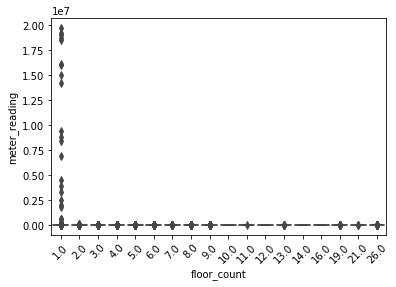

In [195]:
ax = sb.boxplot(x='floor_count', y='meter_reading', data=train)
plt.setp(ax.artists,alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

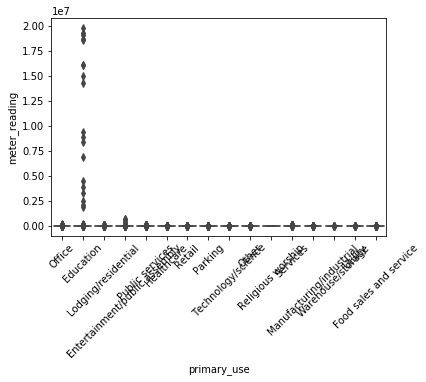

In [196]:
ax = sb.boxplot(x='primary_use', y='meter_reading', data=train)
plt.setp(ax.artists,alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## Prepare and save train data(divide in parts,  aggregate, and do preprocessing)

In [199]:
train = pd.read_csv('C://Users//stron//Downloads//KAGGLE//train.csv')
buildings = pd.read_csv('C://Users//stron//Downloads//KAGGLE//building_metadata.csv')
weather = pd.read_csv('C://Users//stron//Downloads//KAGGLE//weather_train.csv')
weather = weather.drop(columns=['cloud_coverage','precip_depth_1_hr','sea_level_pressure','wind_direction','dew_temperature'])
buildings = buildings.drop(columns=['year_built'])

def modify_and_save(tmp,buildings,weather,i):
    tmp = tmp.set_index(['building_id','meter','timestamp'],drop=False).join(buildings.set_index('building_id'))
    tmp = pd.merge(tmp.set_index(['site_id'],drop=False,append=True), weather.set_index(['site_id','timestamp']), on=['site_id','timestamp'], how='inner')
    tmp = tmp.apply(change, axis=1)
    tmp['floor_count'] = tmp['floor_count'].fillna(1)
    tmp = tmp.dropna()
    tmp.to_pickle('./part{}.pkl'.format(i))
    
for i in range(20):
    if i==19:
        tmp = train[1000000*i:-1]
    else:
        tmp = train[1000000*i:1000000*(i+1)]
    modify_and_save(tmp,buildings,weather,i)
    

c:\users\stron\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'site_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
c:\users\stron\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


## Encode timestamp column into numeric type

In [13]:
train = pd.read_pickle('./part0.pkl')
for value in train['timestamp'].unique():
    train.loc[train['timestamp']==value,'timestamp'] = train.loc[train['timestamp']==value,'meter_reading'].mean() 
train.to_pickle('./train.pkl')

## Encode meter, primary_use, floor_count columns using one-hot and drop unuseful columns and then train and validate (R2 metric) model based on Decision trees.

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor

train = pd.read_pickle('./train.pkl')

ridge = DecisionTreeRegressor(max_depth=5)
train = train.drop(columns=['building_id','site_id'])
train.head()
col_trns = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['meter','primary_use','floor_count']),
    (StandardScaler(),['square_feet','air_temperature','wind_speed','timestamp']), remainder='passthrough')
pipe = make_pipeline(col_trns,ridge)
print(cross_val_score(pipe,train.drop(columns=['meter_reading']),train['meter_reading'],cv=5,scoring='r2'))

[0.87956171 0.97664945 0.98404665 0.86488843 0.85385089]
